In [4]:
import pandas as pd
from sklearn.metrics import accuracy_score

In [35]:
import matplotlib.pyplot as plt

In [6]:
xtrain=pd.read_csv('FinalTrain.csv')
xtest=pd.read_csv('FinalTest.csv')

In [8]:
xtest.head()


,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,0,0.430039,0,0,1,0.000839,0,2
1,3,1,0.586622,1,0,1,0.001145,0,0
2,2,0,0.774521,0,0,1,0.001512,0,2
3,3,0,0.336089,0,0,1,0.000656,0,0
4,3,1,0.273456,1,1,1,0.000534,0,0


In [7]:
xtrain.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,0,0.273456,1,0,0,0.000534,0,0
1,1,1,0.473882,1,0,0,0.000925,3,1
2,3,1,0.323563,0,0,0,0.000632,0,0
3,1,1,0.436302,1,0,1,0.000852,3,0
4,3,0,0.436302,0,0,1,0.000852,0,0


In [12]:
y=pd.read_csv('Survived.csv')
y=y.values.ravel()

# Logistic Regression

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(xtrain,y,test_size=.2,random_state=33)

In [15]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(x_train,y_train)
print("Accuracy score for train data {} \n Accuracy score for test data {} ".format(lg.score(x_train,y_train),accuracy_score(lg.predict(x_test),y_test)))

Accuracy score for train data 0.8103932584269663 
 Accuracy score for test data 0.8100558659217877 


# Decision tree

In [17]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
print("Accuracy score for train data {} \nAccuracy score for test data {} ".format(dt.score(x_train,y_train),accuracy_score(dt.predict(x_test),y_test)))

Accuracy score for train data 0.9508426966292135 
Accuracy score for test data 0.8100558659217877 


## post pruning decision trees with cost complexity pruning

In [34]:
path=dt.cost_complexity_pruning_path(x_train,y_train)
ccp_alphas,impurities = path.ccp_alphas,path.impurities
print(ccp_alphas,impurities)

[0.00000000e+00 0.00000000e+00 9.17970184e-06 1.87265918e-05
 2.83736239e-05 1.46301498e-04 1.58892294e-04 1.87265918e-04
 1.98281560e-04 2.23066755e-04 2.37008427e-04 2.80898876e-04
 2.80898876e-04 3.00963082e-04 3.19203269e-04 3.19203269e-04
 3.46503548e-04 4.43524542e-04 4.68164794e-04 4.68164794e-04
 4.68164794e-04 4.68164794e-04 4.86404981e-04 7.02247191e-04
 7.12887300e-04 7.22311396e-04 7.34167518e-04 8.32292967e-04
 8.56072766e-04 8.61795889e-04 8.89513109e-04 9.14765634e-04
 9.21227498e-04 9.36329588e-04 9.36329588e-04 9.36329588e-04
 9.36329588e-04 1.05337079e-03 1.05337079e-03 1.09226448e-03
 1.09238452e-03 1.12359551e-03 1.17041199e-03 1.17041199e-03
 1.22893258e-03 1.23619721e-03 1.25118187e-03 1.26404494e-03
 1.29005410e-03 1.30417335e-03 1.31086142e-03 1.32639941e-03
 1.33267365e-03 1.34987516e-03 1.42678794e-03 1.43461025e-03
 1.57024217e-03 1.57033460e-03 1.61880336e-03 1.62920440e-03
 1.64281018e-03 1.79574639e-03 1.92305875e-03 1.99258316e-03
 2.23125349e-03 2.260567

In [37]:
clfs=[]
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0 , ccp_alpha=ccp_alpha)
    clf.fit(x_train,y_train)
    clfs.append(clf)

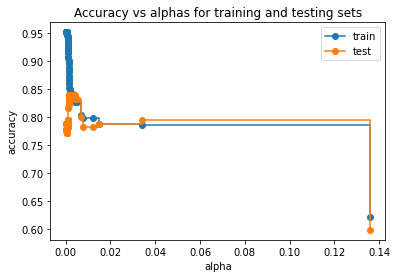

In [46]:
train_scores=[]
test_scores=[]
train_scores=[clf.score(x_train,y_train) for clf in clfs]
test_scores=[clf.score(x_test,y_test) for clf in clfs]

fig,ax= plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alphas for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o',label='train',drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, marker='o',label='test',drawstyle='steps-post')
ax.legend()
plt.show()

In [51]:
print(max(test_scores),test_scores.index(max(test_scores)))
print("ccp alpha",ccp_alphas[51])
ccpalpha=ccp_alphas[51]

0.8379888268156425 51
ccp alpha 0.001326399408919543


In [52]:
dth=DecisionTreeClassifier(random_state=0,ccp_alpha=ccpalpha)
dth.fit(x_train,y_train)
print("Accuracy score for train data {} \nAccuracy score for test data {} ".format(dth.score(x_train,y_train),accuracy_score(dth.predict(x_test),y_test)))

Accuracy score for train data 0.8932584269662921 
Accuracy score for test data 0.8379888268156425 


# Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
print("Accuracy score for train data {} \nAccuracy score for test data {} ".format(rf.score(x_train,y_train),accuracy_score(rf.predict(x_test),y_test)))

Accuracy score for train data 0.9508426966292135 
Accuracy score for test data 0.8212290502793296 


# SVM

In [32]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(x_train,y_train)
print("Accuracy score for train data {} \nAccuracy score for test data {} ".format(sv.score(x_train,y_train),accuracy_score(sv.predict(x_test),y_test)))

Accuracy score for train data 0.8216292134831461 
Accuracy score for test data 0.8268156424581006 


# knn

In [33]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
kn.fit(x_train,y_train)
print("Accuracy score for train data {} \nAccuracy score for test data {} ".format(kn.score(x_train,y_train),accuracy_score(kn.predict(x_test),y_test)))

Accuracy score for train data 0.8370786516853933 
Accuracy score for test data 0.8100558659217877 


In [65]:
models={"Logistic_regression":lg,"Decision_trees":dt,"DecisionTrees_ccp":dth,"svm":sv,"Knn":kn}
import pickle
for model in models:
    st=''
    st='./models/'+model+".pkl"
    pickle.dump(models[model],open(st,'wb'))

In [59]:
pickle.dump(lg,open('./models/LogisticRegression.pkl','wb'))

# submitt to kaggle

In [66]:
test=pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [86]:

y1=test[['PassengerId']]
xx=pd.read_csv('FinalTest.csv')
y1['Survived']=''
for model in models:
    models[model].fit(xtrain,y)
    y1['Survived']=models[model].predict(xx)
    y1.to_csv("./output/{}.csv".format(model),index=False)

ipykernel_launcher:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipykernel_launcher:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipykernel_launcher:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipykernel_launcher:6: SettingWithCopyWarning: 
A value is trying to be

In [85]:

y1=test[['PassengerId']]
y1['Survived']=''

y1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  418 non-null    int64 
 1   Survived     418 non-null    object
dtypes: int64(1), object(1)
memory usage: 6.7+ KB


ipykernel_launcher:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
z=lg.predict(xx)
z